<a href="https://colab.research.google.com/github/yohenthounaojam/hamiltonian/blob/master/Hamiltonian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# Hamiltonian Paths
Finding hamiltonian paths between two random nodes. 
---



### Creating a random graph with the following specs:
- Minimum number of nodes = 100
- Minimum degree of each node = 1



The number of vertices in this graph is 100


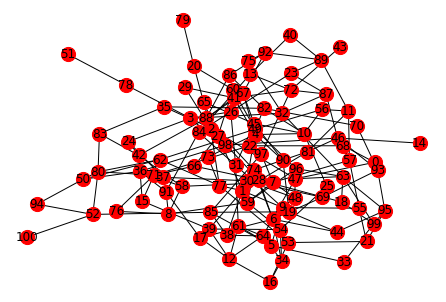

In [27]:
# Importing the libraries below
import networkx as nx
import random
import matplotlib.pyplot as plt

def createRandomGraph(nodes, edges):
  # Creating new graph
  graph = nx.Graph()

  # Generating a random number of vertices between 100 and 150
  vertices=random.randrange(nodes,nodes+1)
  print("The number of vertices in this graph is "+str(vertices))

  # Adding nodes
  for i in range(vertices+1):
    graph.add_node(i)

  # Adding randomly generated edges
  for i in range(vertices+1):
    connections=random.randrange(1,edges)
    for j in range(connections):
      graph.add_edge(i,random.randrange(0,vertices)) 

  # Plotting the graph generated. 
  nx.draw(graph,with_labels=True,node_size=200, node_color="red")
  plt.show()
  return graph

graph=createRandomGraph(100,4)



---
Now randomly selecting two nodes **x** and **y**


In [24]:
x = random.randrange(1,vertices)
y = x
# Making sure x and y are not the same. To avoid a cycle. 
while(y==x):
  y=random.randrange(1,vertices)
  
print("x is: " + str(x))
print("y is: " + str(y))

x is: 2
y is: 4




---
The following are methods that help find the hamiltonian path



In [0]:
def showPath(path):
  graph = nx.Graph()
  for i in range(len(path)):
    graph.add_edge(path[i],path[i-1])
  graph.remove_edge(path[0],path[-1])
  nx.draw(graph,with_labels=True,node_size=400, edge_color="gray", node_color="red", alpha=0.5, width=4)
  plt.show()
  return graph

def hamiltonianHelp(graph, x, y, visited, path,start, dest): 
  global exists
  # Marking the current vertex/node as True; visited. 
  print("x:"+str(x)+",  visited: "+str(visited))
  visited[x]= True
  # Adding the visited node to the path array
  path.append(x) 
  # If the current node is the same as y, then print the path 
  # **Important condition: Only print the path if the len(path) is the same as number of nodes. 
  # The above condition ensures that all nodes have been visited once and once only. 
  if x==y: 
    # print(len(path))
    if (len(path)==len(graph)):
      showPath(path)
      print(path)
      exists=1
  else: 
    # If current ndoe is not x , recursively call for each adjacent vertex.
    if len(graph[x])<2 and (x!=start and x!=dest):
      # print(x)
      # print(start)
      # print(str(graph[x]))
      global lemma1
      lemma1=x
      exists=2
      return 
    for i in graph[x]:
      # print(i)
      # print(visited) 
      if visited[i]==False: 
          hamiltonianHelp(graph, i, y, visited, path, start, dest)
          if exists==2:
            return  
              
  # Finally remove the current vertex from path and mark it as unvisited.  
  path.pop() 
  visited[x]= False
   
# Lemma1 as a global variable
lemma1=0
exists=0
def hamiltonianPaths(graph,x, y): 
    # Marking all the vertices as False; not visited.  
    visited =[False]*(len(graph)) 
    start=x
    dest=y
    # Output Deciders
    global lemma1
    lemma1=0
    global exists
    exists=0
    # Empty array to store all paths between x and y
    path = [] 

    # Calling recursive helper fucntion.  
    hamiltonianHelp(graph, x, y,visited, path, start, dest) 
    if exists==1:
      print("The above are the Hamiltonian Paths present in the graph between vertics "+ str(x) +  " and "+ str(y))
    elif exists==2:
      print("Lemma 1 condition met at node "+str(lemma1)+".")
      print("No Hamiltonian Paths")
    else:
      print("No Hamiltonian Paths")

In [28]:
hamiltonianPaths(graph,x,y) 

Lemma 1 condition met at node 14.
No Hamiltonian Paths




---
Sample Run for 15 nodes. 


The number of vertices in this graph is 10


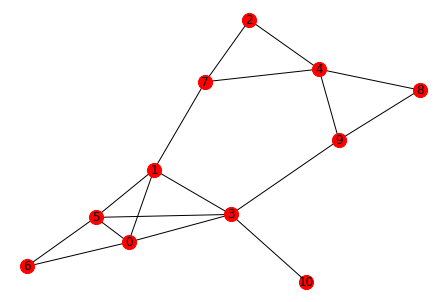

In [60]:
sampleGraph = createRandomGraph(10,5)

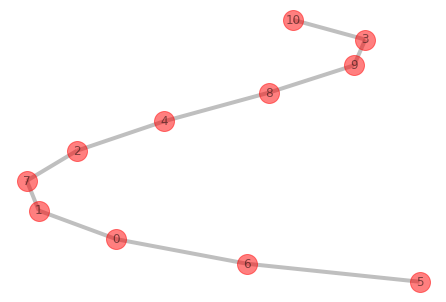

[10, 3, 9, 8, 4, 2, 7, 1, 0, 6, 5]
The above are the Hamiltonian Paths present in the graph between vertics 10 and 5


In [61]:
hamiltonianPaths(sampleGraph,10,5)

The number of vertices in this graph is 5


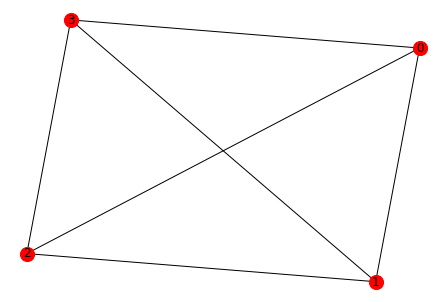

x:1,  visited: [False, False, False, False]
x:0,  visited: [False, True, False, False]
x:3,  visited: [True, True, False, False]
x:2,  visited: [True, True, False, False]
x:3,  visited: [True, True, True, False]


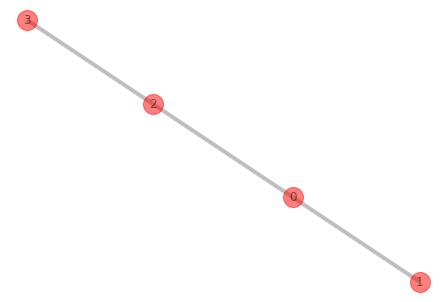

[1, 0, 2, 3]
x:3,  visited: [False, True, False, False]
x:2,  visited: [False, True, False, False]
x:0,  visited: [False, True, True, False]
x:3,  visited: [True, True, True, False]


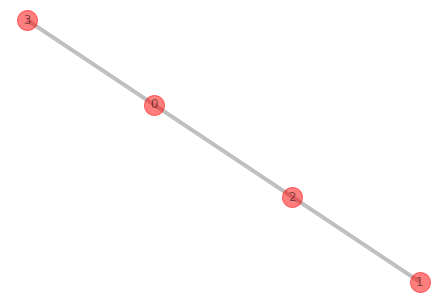

[1, 2, 0, 3]
x:3,  visited: [False, True, True, False]
The above are the Hamiltonian Paths present in the graph between vertics 1 and 3


In [65]:
graph = nx.Graph()
vertices=5
print("The number of vertices in this graph is "+str(vertices))
graph.add_edge(0,1)
graph.add_edge(0,3)
graph.add_edge(0,2)
graph.add_edge(1,3)
graph.add_edge(1,2)
# graph.add_edge(4,2)
# graph.add_edge(4,3)
graph.add_edge(3,2)


#Plotting the graph generated. 
nx.draw(graph,with_labels=True,node_size=200, node_color="red")
plt.show()

hamiltonianPaths(graph,1,3) 




---

 Please omit the code below. 

Performing a simple DFS.
Was used for reference for the above code.

In [0]:
def DFSUtil(x, graph, visited,nodes): 
    visited[x] = True
    print(x, end = '-')
    nodes.append(x)
    for i in graph[x]: 
      if visited[i] == False:  
        DFSUtil(i, graph, visited, nodes) 
      
def DFS(x, graph): 
    nodes=[]
    visited = [False] * (len(graph)) 
    DFSUtil(x, graph, visited,nodes) 

print(DFS(3, graph))


3-0-1-2-4-None


In [0]:
# def dfs1(v,adj, label, instack_count, n):
#   if(instack_count==n):
#     return True
#   for i in range(n):
#     # print("i:"+str(i))
#     # print("v:"+str(v))
#     # print(adj[v])
#     # print("Label: "+str(label))
#     if (i in adj[v]):
#       if (label[i]==0):
#         label[i]=1
#       if(dfs1(i,adj,label,instack_count+1,n)):
#         return True
#       label[i]=0
#     return False

# def hamiltoniandfs(adj, n):
#   label=[0]*n
#   for i in range(n):
#     label[i]=1;
#     print(label)
#     if(dfs1(i,adj,label,1,n)):
#       print("inside if")
#       return true
#     label[i]=0
#   return False

# hamiltoniandfs(graph,vertices)

[1, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 1, 0]
[0, 0, 0, 1]


False